In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
#import dataset with redundant features removed
df_NBA_slim = pd.read_csv('NBA_numeric_slim.csv')
df_NBA_slim.head()

,season,age,w,sos,o_rtg,d_rtg,pace,f_tr,x3p_ar,ts_percent,...,away_orb_percent,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_attend,away_attend_g,home_score,away_score,spread
0,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,27.2,0.481,14.2,70.1,0.274,656081.0,16002.0,120,117,3
1,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,29.5,0.497,14.7,70.9,0.269,591701.0,14432.0,90,93,-3
2,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,28.4,0.454,14.4,72.6,0.262,828384.0,20204.0,105,114,-9
3,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,28.4,0.482,15.1,71.7,0.247,723949.0,17657.0,110,107,3
4,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,31.2,0.461,13.5,73.0,0.207,905116.0,22076.0,68,95,-27


In [3]:
#what is the range on spreads?
df_NBA_slim['spread'].describe()

count    11486.000000
mean         2.792356
std         13.342616
min        -56.000000
25%         -7.000000
50%          4.000000
75%         11.000000
max         61.000000
Name: spread, dtype: float64

In [4]:
df_NBA_slim['home win'] = df_NBA_slim['spread'] > 0


In [5]:
#no ties in the NBA

df_NBA_slim['home win'].value_counts(dropna=False)

home win
True     6762
False    4724
Name: count, dtype: int64

In [31]:
#make 10 bins of spread values
pd.set_option('display.max_columns', 1000)
spread_names=['-5','-4','-3','-2', '-1', '+1', '+2','+3','+4','+5'] 
df_NBA_slim['spread_cat'], bins = pd.cut(df_NBA_slim['spread'], 10, retbins=True, labels=spread_names)
df_NBA_slim['spread_cat']
df_NBA_slim['spread_cat'].value_counts()

spread_cat
+1    4157
-1    3242
-2    1578
+2    1549
+3     423
-3     407
+4      77
-4      41
-5       6
+5       6
Name: count, dtype: int64

In [7]:
bins_counts = pd.DataFrame(df_NBA_slim['spread_cat'].value_counts())
bins_counts

#bin ranges below
"""
spread_cat	
(2.5, 14.2]	4157
(-9.2, 2.5]	3242
(-20.9, -9.2]	1578
(14.2, 25.9]	1549
(25.9, 37.6]	423
(-32.6, -20.9]	407
(37.6, 49.3]	77
(-44.3, -32.6]	41
(-56.117, -44.3]	6
(49.3, 61.0]	6
"""

,count
spread_cat,
"(2.5, 14.2]",4157
"(-9.2, 2.5]",3242
"(-20.9, -9.2]",1578
"(14.2, 25.9]",1549
"(25.9, 37.6]",423
"(-32.6, -20.9]",407
"(37.6, 49.3]",77
"(-44.3, -32.6]",41
"(-56.117, -44.3]",6


In [8]:
bins_counts['bins'] = bins_counts.index
bins_counts

,count,bins
spread_cat,,
"(2.5, 14.2]",4157,"(2.5, 14.2]"
"(-9.2, 2.5]",3242,"(-9.2, 2.5]"
"(-20.9, -9.2]",1578,"(-20.9, -9.2]"
"(14.2, 25.9]",1549,"(14.2, 25.9]"
"(25.9, 37.6]",423,"(25.9, 37.6]"
"(-32.6, -20.9]",407,"(-32.6, -20.9]"
"(37.6, 49.3]",77,"(37.6, 49.3]"
"(-44.3, -32.6]",41,"(-44.3, -32.6]"
"(-56.117, -44.3]",6,"(-56.117, -44.3]"


In [9]:
bins_counts.columns

Index(['count', 'bins'], dtype='object')

In [10]:
#bins_counts_sorted = bins_counts.sort_values(bins_counts['bins'])
#bins_counts_sorted


In [38]:
#bin by deciles
df_NBA_slim['dec_spread_cat'], bins = pd.qcut(df_NBA_slim['spread'], 10, retbins=True, labels=spread_names)
df_NBA_slim

,season,age,w,sos,o_rtg,d_rtg,pace,f_tr,x3p_ar,ts_percent,tov_percent,orb_percent,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g,away_age,away_w,away_sos,away_o_rtg,away_d_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_tov_percent,away_orb_percent,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_attend,away_attend_g,home_score,away_score,spread,home win,spread_cat,dec_spread_cat,spread_cat_str
0,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,27.1,45.0,-0.52,107.5,106.6,93.3,0.357,0.192,0.551,14.7,27.2,0.481,14.2,70.1,0.274,656081.0,16002.0,120,117,3,True,+1,-1,"0 (2.5, 14.2]\n1 (-9.2, 2...."
1,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,24.9,18.0,-0.16,101.1,107.5,92.3,0.306,0.128,0.497,13.3,29.5,0.497,14.7,70.9,0.269,591701.0,14432.0,90,93,-3,False,-1,-2,"0 (2.5, 14.2]\n1 (-9.2, 2...."
2,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,25.0,47.0,-0.41,101.4,100.3,92.4,0.311,0.217,0.517,15.5,28.4,0.454,14.4,72.6,0.262,828384.0,20204.0,105,114,-9,False,-1,-4,"0 (2.5, 14.2]\n1 (-9.2, 2...."
3,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,26.7,49.0,0.20,106.0,103.9,93.5,0.350,0.142,0.535,13.8,28.4,0.482,15.1,71.7,0.247,723949.0,17657.0,110,107,3,True,+1,-1,"0 (2.5, 14.2]\n1 (-9.2, 2...."
4,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,27.9,54.0,-0.55,105.6,101.2,87.2,0.335,0.164,0.519,13.3,31.2,0.461,13.5,73.0,0.207,905116.0,22076.0,68,95,-27,False,-3,-5,"0 (2.5, 14.2]\n1 (-9.2, 2...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,2020,25.1,25.0,-0.57,110.9,115.5,102.7,0.270,0.358,0.562,12.2,22.2,0.558,13.9,75.3,0.231,532702.0,16647.0,29.2,56.0,-0.67,112.4,102.9,105.1,0.271,0.428,0.583,12.9,20.7,0.489,12.0,81.6,0.178,549036.0,17711.0,134,137,-3,False,-1,-2,"0 (2.5, 14.2]\n1 (-9.2, 2...."
11482,2020,25.1,25.0,-0.57,110.9,115.5,102.7,0.270,0.358,0.562,12.2,22.2,0.558,13.9,75.3,0.231,532702.0,16647.0,24.5,21.0,-0.26,106.5,113.0,98.6,0.263,0.318,0.531,12.6,25.8,0.541,12.4,78.3,0.224,620789.0,18812.0,122,115,7,True,+1,+1,"0 (2.5, 14.2]\n1 (-9.2, 2...."
11483,2020,25.1,25.0,-0.57,110.9,115.5,102.7,0.270,0.358,0.562,12.2,22.2,0.558,13.9,75.3,0.231,532702.0,16647.0,26.1,33.0,0.09,108.5,109.5,98.6,0.256,0.364,0.544,11.5,22.3,0.535,13.2,79.1,0.176,529870.0,17093.0,113,120,-7,False,-1,-3,"0 (2.5, 14.2]\n1 (-9.2, 2...."
11484,2020,25.1,25.0,-0.57,110.9,115.5,102.7,0.270,0.358,0.562,12.2,22.2,0.558,13.9,75.3,0.231,532702.0,16647.0,27.5,35.0,0.54,113.7,114.8,100.7,0.242,0.374,0.570,11.2,22.4,0.530,11.2,75.3,0.208,628303.0,19634.0,103,122,-19,False,-2,-5,"0 (2.5, 14.2]\n1 (-9.2, 2...."


In [29]:
df_NBA_slim['spread_cat_str'] = str(df_NBA_slim['spread_cat'])
df_NBA_slim.head()

,season,age,w,sos,o_rtg,d_rtg,pace,f_tr,x3p_ar,ts_percent,tov_percent,orb_percent,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g,away_age,away_w,away_sos,away_o_rtg,away_d_rtg,away_pace,away_f_tr,away_x3p_ar,away_ts_percent,away_tov_percent,away_orb_percent,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_attend,away_attend_g,home_score,away_score,spread,home win,spread_cat,dec_spread_cat,spread_cat_str
0,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,27.1,45.0,-0.52,107.5,106.6,93.3,0.357,0.192,0.551,14.7,27.2,0.481,14.2,70.1,0.274,656081.0,16002.0,120,117,3,True,"(2.5, 14.2]","(-1.0, 4.0]","0 (2.5, 14.2]\n1 (-9.2, 2...."
1,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,24.9,18.0,-0.16,101.1,107.5,92.3,0.306,0.128,0.497,13.3,29.5,0.497,14.7,70.9,0.269,591701.0,14432.0,90,93,-3,False,"(-9.2, 2.5]","(-5.0, -1.0]","0 (2.5, 14.2]\n1 (-9.2, 2...."
2,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,25.0,47.0,-0.41,101.4,100.3,92.4,0.311,0.217,0.517,15.5,28.4,0.454,14.4,72.6,0.262,828384.0,20204.0,105,114,-9,False,"(-9.2, 2.5]","(-14.0, -9.0]","0 (2.5, 14.2]\n1 (-9.2, 2...."
3,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,26.7,49.0,0.20,106.0,103.9,93.5,0.350,0.142,0.535,13.8,28.4,0.482,15.1,71.7,0.247,723949.0,17657.0,110,107,3,True,"(2.5, 14.2]","(-1.0, 4.0]","0 (2.5, 14.2]\n1 (-9.2, 2...."
4,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,14.9,30.7,0.513,14.0,72.1,0.289,586390.0,14302.0,27.9,54.0,-0.55,105.6,101.2,87.2,0.335,0.164,0.519,13.3,31.2,0.461,13.5,73.0,0.207,905116.0,22076.0,68,95,-27,False,"(-32.6, -20.9]","(-56.001, -14.0]","0 (2.5, 14.2]\n1 (-9.2, 2...."


In [30]:
df_NBA_slim['spread_cat_str'].value_counts()

spread_cat_str
0           (2.5, 14.2]\n1           (-9.2, 2.5]\n2           (-9.2, 2.5]\n3           (2.5, 14.2]\n4        (-32.6, -20.9]\n              ...      \n11481       (-9.2, 2.5]\n11482       (2.5, 14.2]\n11483       (-9.2, 2.5]\n11484     (-20.9, -9.2]\n11485     (-20.9, -9.2]\nName: spread_cat, Length: 11486, dtype: category\nCategories (10, interval[float64, right]): [(-56.117, -44.3] < (-44.3, -32.6] < (-32.6, -20.9] < (-20.9, -9.2] ... (14.2, 25.9] < (25.9, 37.6] < (37.6, 49.3] < (49.3, 61.0]]    11486
Name: count, dtype: int64

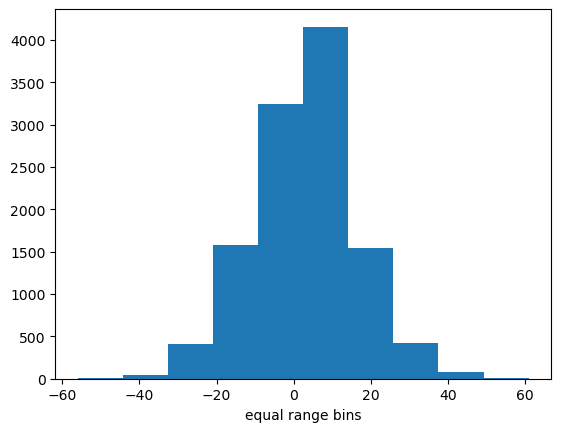

In [13]:
plt.xlabel('equal range bins')
plt.hist(df_NBA_slim['spread'], bins=10)
plt.savefig('erb.png')

In [42]:
#prepare data for analysis with categorical targets (equal range of spread categories so not equal numbers in each bin)
#create training and test sets
train_set_r, test_val_set_r = train_test_split(df_NBA_slim, test_size=0.2, 
                                       stratify=df_NBA_slim['season'], random_state=42)

#separate into data (X) and targets(y).  Remove "season" and various targets.
X_train_r = train_set_r.iloc[:,1:-6]
y_train_r = train_set_r.iloc[:,-3]

#split test_val_set into test and validation sets
test_set_r, val_set_r = train_test_split(test_val_set_r, test_size=0.5, 
                                       stratify=test_val_set_r['season'], random_state=42)

X_test_r = test_set_r.iloc[:,1:-6]
y_test_r = test_set_r.iloc[:,-3]

X_val_r = val_set_r.iloc[:,1:-6]
y_val_r = val_set_r.iloc[:,-3]

ss = StandardScaler()
X_train_r_ss = ss.fit_transform(X_train_r)
X_test_r_ss = ss.transform(X_test_r)
X_val_r_ss = ss.transform(X_val_r)


In [34]:
y_train_r.dtype

CategoricalDtype(categories=['-5', '-4', '-3', '-2', '-1', '+1', '+2', '+3', '+4', '+5'], ordered=True, categories_dtype=object)

In [35]:
#get an initial estimate of accuracy using a support vector classifier
#40 percent doesn't seem that bad, but 60-70 percent of the data are in 2 of 10 categories

sv_clf = SVC()
cross_val_score(sv_clf, X_train_r_ss, y_train_r, cv=10, scoring='accuracy', n_jobs=-1)

C:\Users\johann\AppData\Local\anaconda3\envs\bio\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


array([0.41131665, 0.43743199, 0.42437432, 0.44396083, 0.41458107,
       0.40587595, 0.43199129, 0.44069641, 0.4204793 , 0.42156863])

In [43]:
y_train_r_eb = train_set_r.iloc[:,-2]
y_train_r_eb

4634     +1
3625     +1
11235    +2
1438     +5
220      +2
         ..
7674     -5
4194     -4
3152     -4
4851     +4
3538     -1
Name: dec_spread_cat, Length: 9188, dtype: category
Categories (10, object): ['-5' < '-4' < '-3' < '-2' ... '+2' < '+3' < '+4' < '+5']

In [44]:
#try with categories with equal numbers of game results


cross_val_score(sv_clf, X_train_r_ss, y_train_r_eb, cv=10, scoring='accuracy', n_jobs=-1)

#better than random, but not very good.  
#array([0.20565832, 0.19912949, 0.20348205, 0.20021763, 0.18715996,
 #      0.20239391, 0.20348205, 0.18389554, 0.2211329 , 0.21568627])

array([0.20565832, 0.19912949, 0.20348205, 0.20021763, 0.18715996,
       0.20239391, 0.20348205, 0.18389554, 0.2211329 , 0.21568627])

In [46]:
%%time
#grid search to optimize parameters

svc = SVC()
param_SVC = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[2,3], 
             'gamma': ['scale','auto'],  'C': [0.1, 1.0, 10]}]

grid_search_svr = GridSearchCV(svc, param_SVC, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svr.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_svr.best_params_)
print(grid_search_svr.best_score_)

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.22768896868445326
CPU times: total: 1min 13s
Wall time: 18min 9s


In [47]:
param_SVC = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[2], 
             'gamma': ['scale','auto'],  'C': [0.5, 10, 20, 40]}]

grid_search_svr = GridSearchCV(svc, param_SVC, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svr.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_svr.best_params_)
print(grid_search_svr.best_score_)

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.22768896868445326


In [52]:
#train and test on test set using optimized hyperparamters

#set y_test for the equal items binned set

y_test_r_eb =  test_set_r.iloc[:,-2]

scv_op = SVC(C=10, kernel = 'linear', gamma='scale')
scv_op.fit(X_train_r_ss, y_train_r_eb)
y_hat = scv_op.predict(X_test_r_ss)
print('accuracy = ', accuracy_score(y_test_r_eb, y_hat))

#accuracy =  0.2410791993037424

accuracy =  0.2410791993037424


In [55]:
%%time

#begin grid searches to find best hyperparameters

rfc = RandomForestClassifier()



param_rfc = [{'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth': [5, 7, 10], 'min_samples_split': [2, 4, 8, 16], 'min_samples_leaf':[2, 4, 8, 16]}]

grid_search_rfr = GridSearchCV(rfc, param_rfc, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_search_rfr.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_rfr.best_params_)
print(grid_search_rfr.best_score_)

"""{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 8}
0.21593303648909518
CPU times: total: 5.22 s
Wall time: 6min 15s"""

{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 8}
0.21593303648909518
CPU times: total: 5.22 s
Wall time: 6min 15s


In [56]:
%%time

param_rfc = [{'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth': [8, 10, 12, 16], 'min_samples_split': [8, 16, 32], 'min_samples_leaf':[6, 8, 12]}]

grid_search_rfr = GridSearchCV(rfc, param_rfc, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_search_rfr.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_rfr.best_params_)
print(grid_search_rfr.best_score_)

"""{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}
0.2181106774481505
CPU times: total: 3 s
Wall time: 5min 37s"""

#hmmmm, alot of hyperparameters moved there without much difference in accuracy.  Min samples leaf really yo-yoed around

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}
0.2181106774481505
CPU times: total: 3 s
Wall time: 5min 37s


In [57]:
%%time

param_rfc = [{'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth': [6,7, 8,9, 10], 'min_samples_split': [6,7,8,9,10], 'min_samples_leaf':[6, 8, 10, 12, 14]}]

grid_search_rfr = GridSearchCV(rfc, param_rfc, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_search_rfr.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_rfr.best_params_)
print(grid_search_rfr.best_score_)

"""{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 9}
0.2176761325504101
CPU times: total: 9.73 s
Wall time: 17min 40s"""

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 9}
0.2176761325504101
CPU times: total: 9.73 s
Wall time: 17min 40s


In [59]:
#train and test the model

rf_op = RandomForestClassifier(max_depth = 7, min_samples_leaf = 8, min_samples_split = 9)
rf_op.fit(X_train_r_ss, y_train_r_eb)
y_hat = rf_op.predict(X_test_r_ss)
print("Accuracy", accuracy_score(y_test_r_eb, y_hat))

#Accuracy 0.22019147084421237

Accuracy 0.22367275892080069


In [63]:
%%time
#try k nearest neighbors with categorical targets

knn = KNeighborsClassifier()

param_knn = [{'n_neighbors': [3, 5, 10, 20, 40], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']}]
grid_search_knn = GridSearchCV(knn, param_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

"""{'algorithm': 'auto', 'n_neighbors': 40, 'weights': 'uniform'}
0.16358423720370122
CPU times: total: 672 ms
Wall time: 51.4 s"""

{'algorithm': 'auto', 'n_neighbors': 40, 'weights': 'uniform'}
0.16358423720370122
CPU times: total: 672 ms
Wall time: 51.4 s


In [64]:
%%time

param_knn = [{'n_neighbors': [20, 40, 80, 160], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']}]
grid_search_knn = GridSearchCV(knn, param_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

"""{'algorithm': 'auto', 'n_neighbors': 160, 'weights': 'distance'}
0.17566430103488742
CPU times: total: 516 ms
Wall time: 37 s"""

{'algorithm': 'auto', 'n_neighbors': 160, 'weights': 'distance'}
0.17566430103488742
CPU times: total: 516 ms
Wall time: 37 s


In [65]:
%%time

param_knn = [{'n_neighbors': [80, 160, 320, 640], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']}]
grid_search_knn = GridSearchCV(knn, param_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 640, 'weights': 'distance'}
0.18110641907400948
CPU times: total: 453 ms
Wall time: 43 s


In [66]:
%%time

param_knn = [{'n_neighbors': [320, 640, 1280, 2560], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']}]
grid_search_knn = GridSearchCV(knn, param_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 1280, 'weights': 'distance'}
0.1826303471798119
CPU times: total: 406 ms
Wall time: 1min 4s


In [67]:
%%time

param_knn = [{'n_neighbors': [1000, 1280, 1600, 2000], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']}]
grid_search_knn = GridSearchCV(knn, param_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_r_ss, y_train_r_eb)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

"""{'algorithm': 'auto', 'n_neighbors': 2000, 'weights': 'distance'}
0.18306619523836887
CPU times: total: 766 ms
Wall time: 1min 17s"""

{'algorithm': 'auto', 'n_neighbors': 2000, 'weights': 'distance'}
0.18306619523836887
CPU times: total: 766 ms
Wall time: 1min 17s


In [69]:
#train algorithm and predict using model

knn = KNeighborsClassifier(n_neighbors=2000, weights='distance')

knn.fit(X_train_r_ss, y_train_r_eb)
y_hat = knn.predict(X_test_r_ss)
print('Accuracy = ', accuracy_score(y_test_r_eb, y_hat))

#Accuracy =  0.18276762402088773

Accuracy =  0.18276762402088773
